<a href="https://colab.research.google.com/github/smkim0508/SML312_NLP_NN_Practice/blob/main/SML312_Mini_2_Sungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SML312 S25 Mini Project \#2
Sungmin Kim

importing necessary dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# necessary for classification models and feature selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score

1. Comparing Classification Models

In [ ]:
# load breast cancer dataset
cancer = sk.datasets.load_breast_cancer()
cancer.targer_names = ["malignant", "benign"] # 0: cancerous, 1: non-cancer

# format into pandas df
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df["target"] = cancer.target

cancer_df

# perform 80/20 train/test split
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline

target = cancer_df['target']
features = cancer_df.drop('target', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

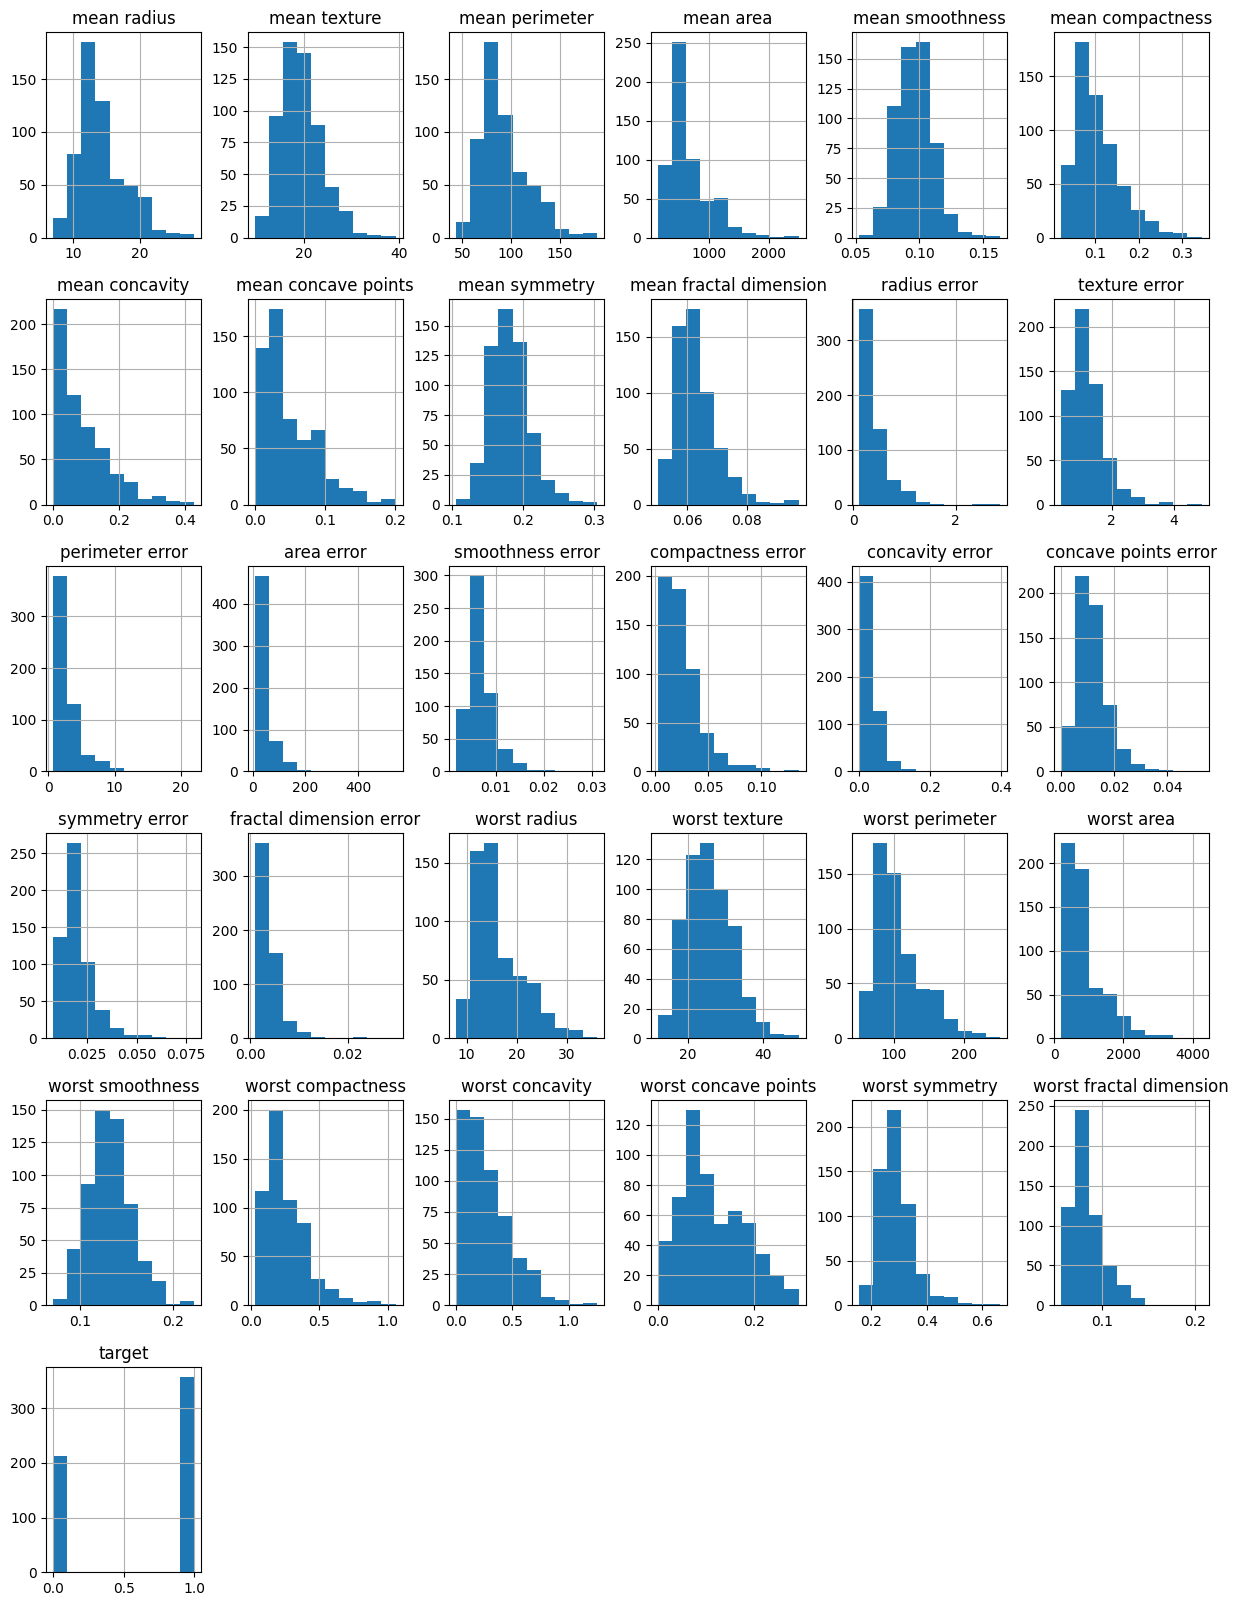

In [ ]:
# understanding the breast cancer dataset, EDA
# using histographs
print(cancer_df.info())
cancer_df.hist(figsize=(15, 20))

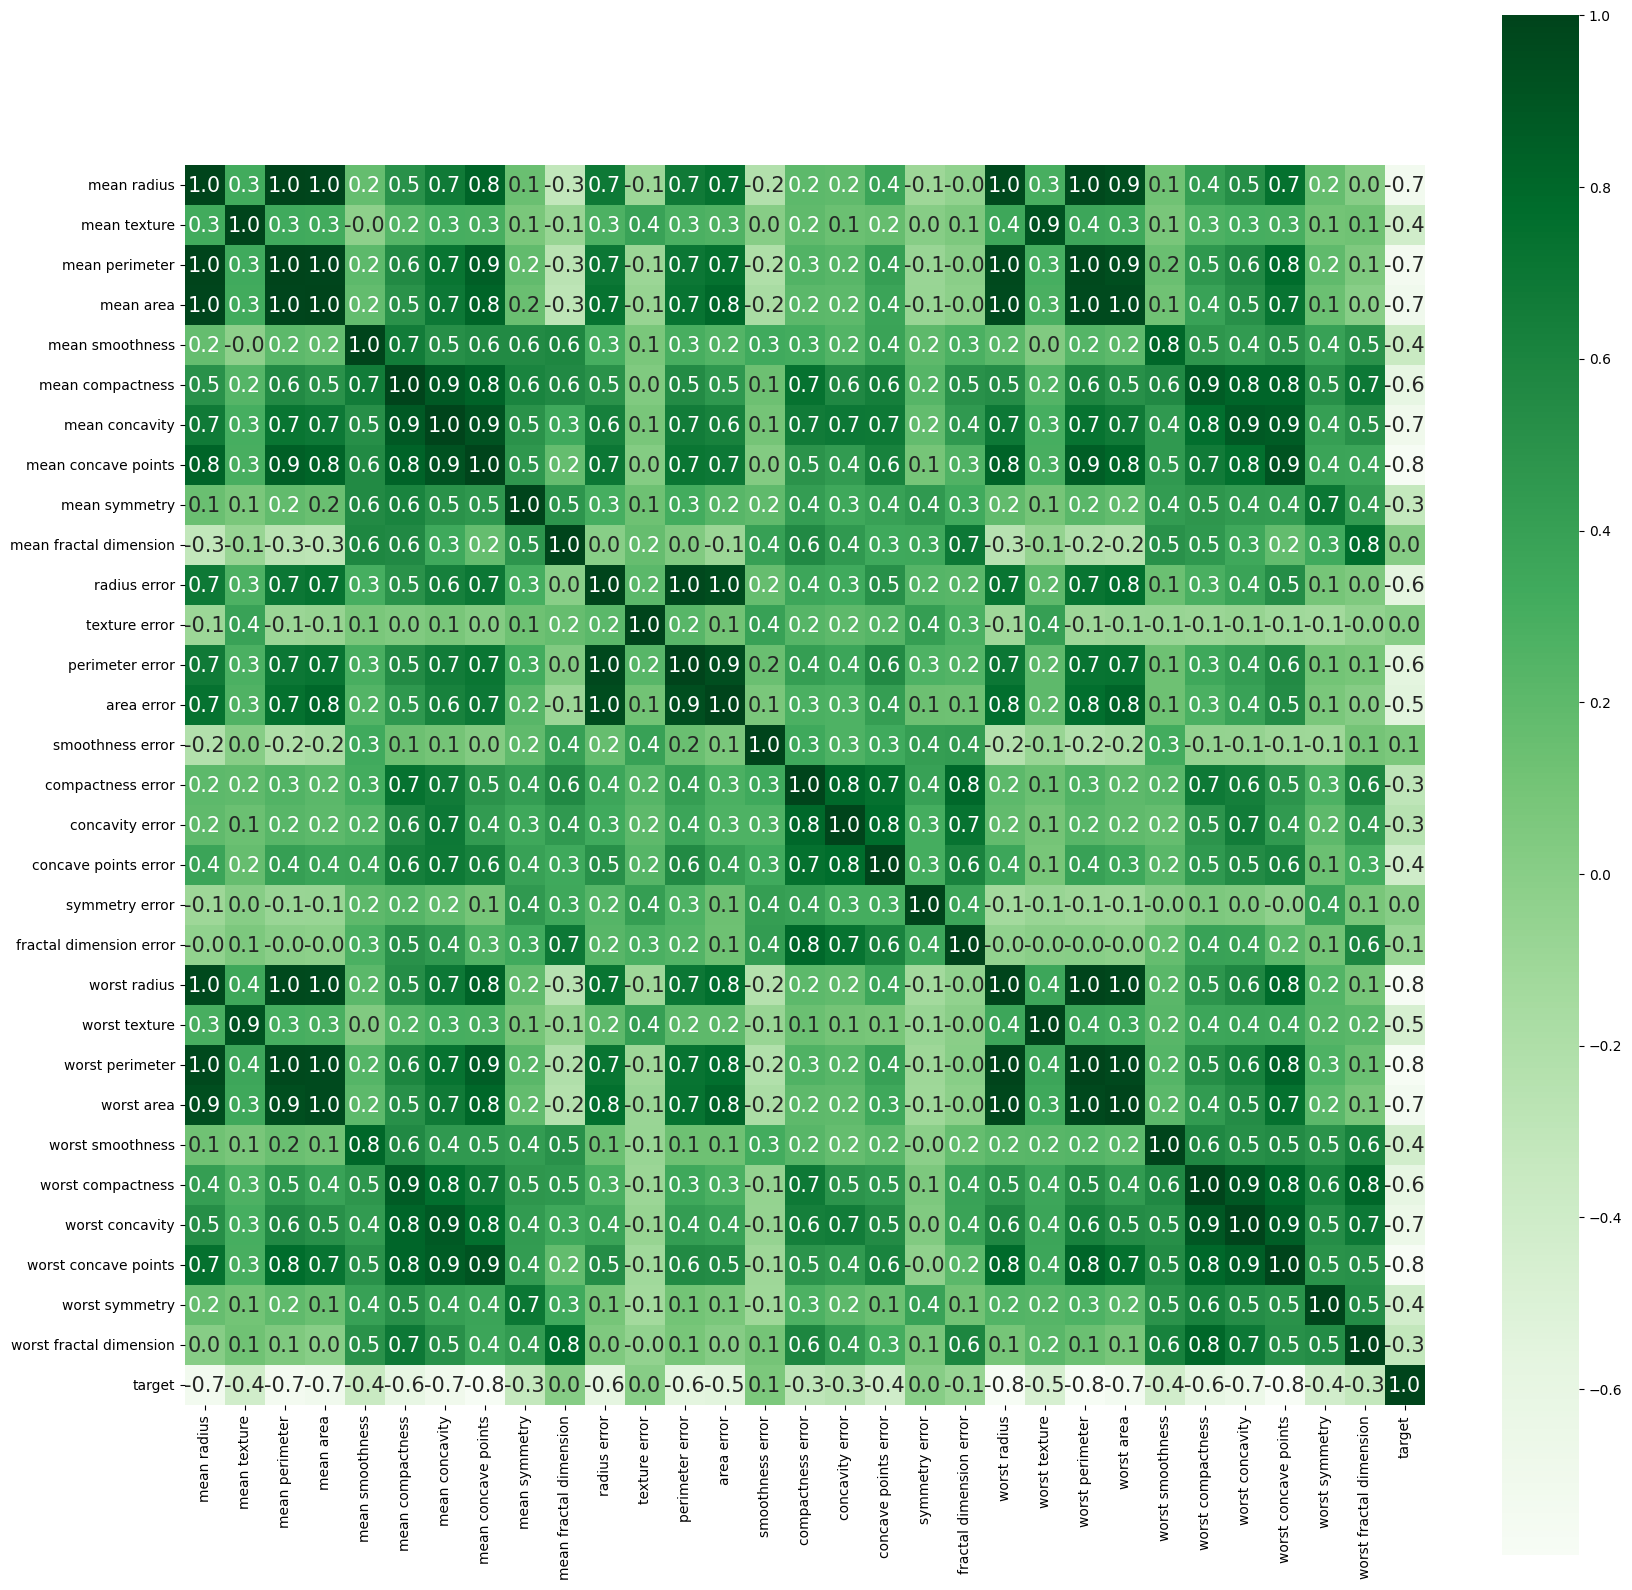

In [ ]:
# mapping the heatmap of correlations
plt.figure(figsize=(20,20))

corr = cancer_df.corr()
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [ ]:
# prints all of the features to select from for pairplot
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

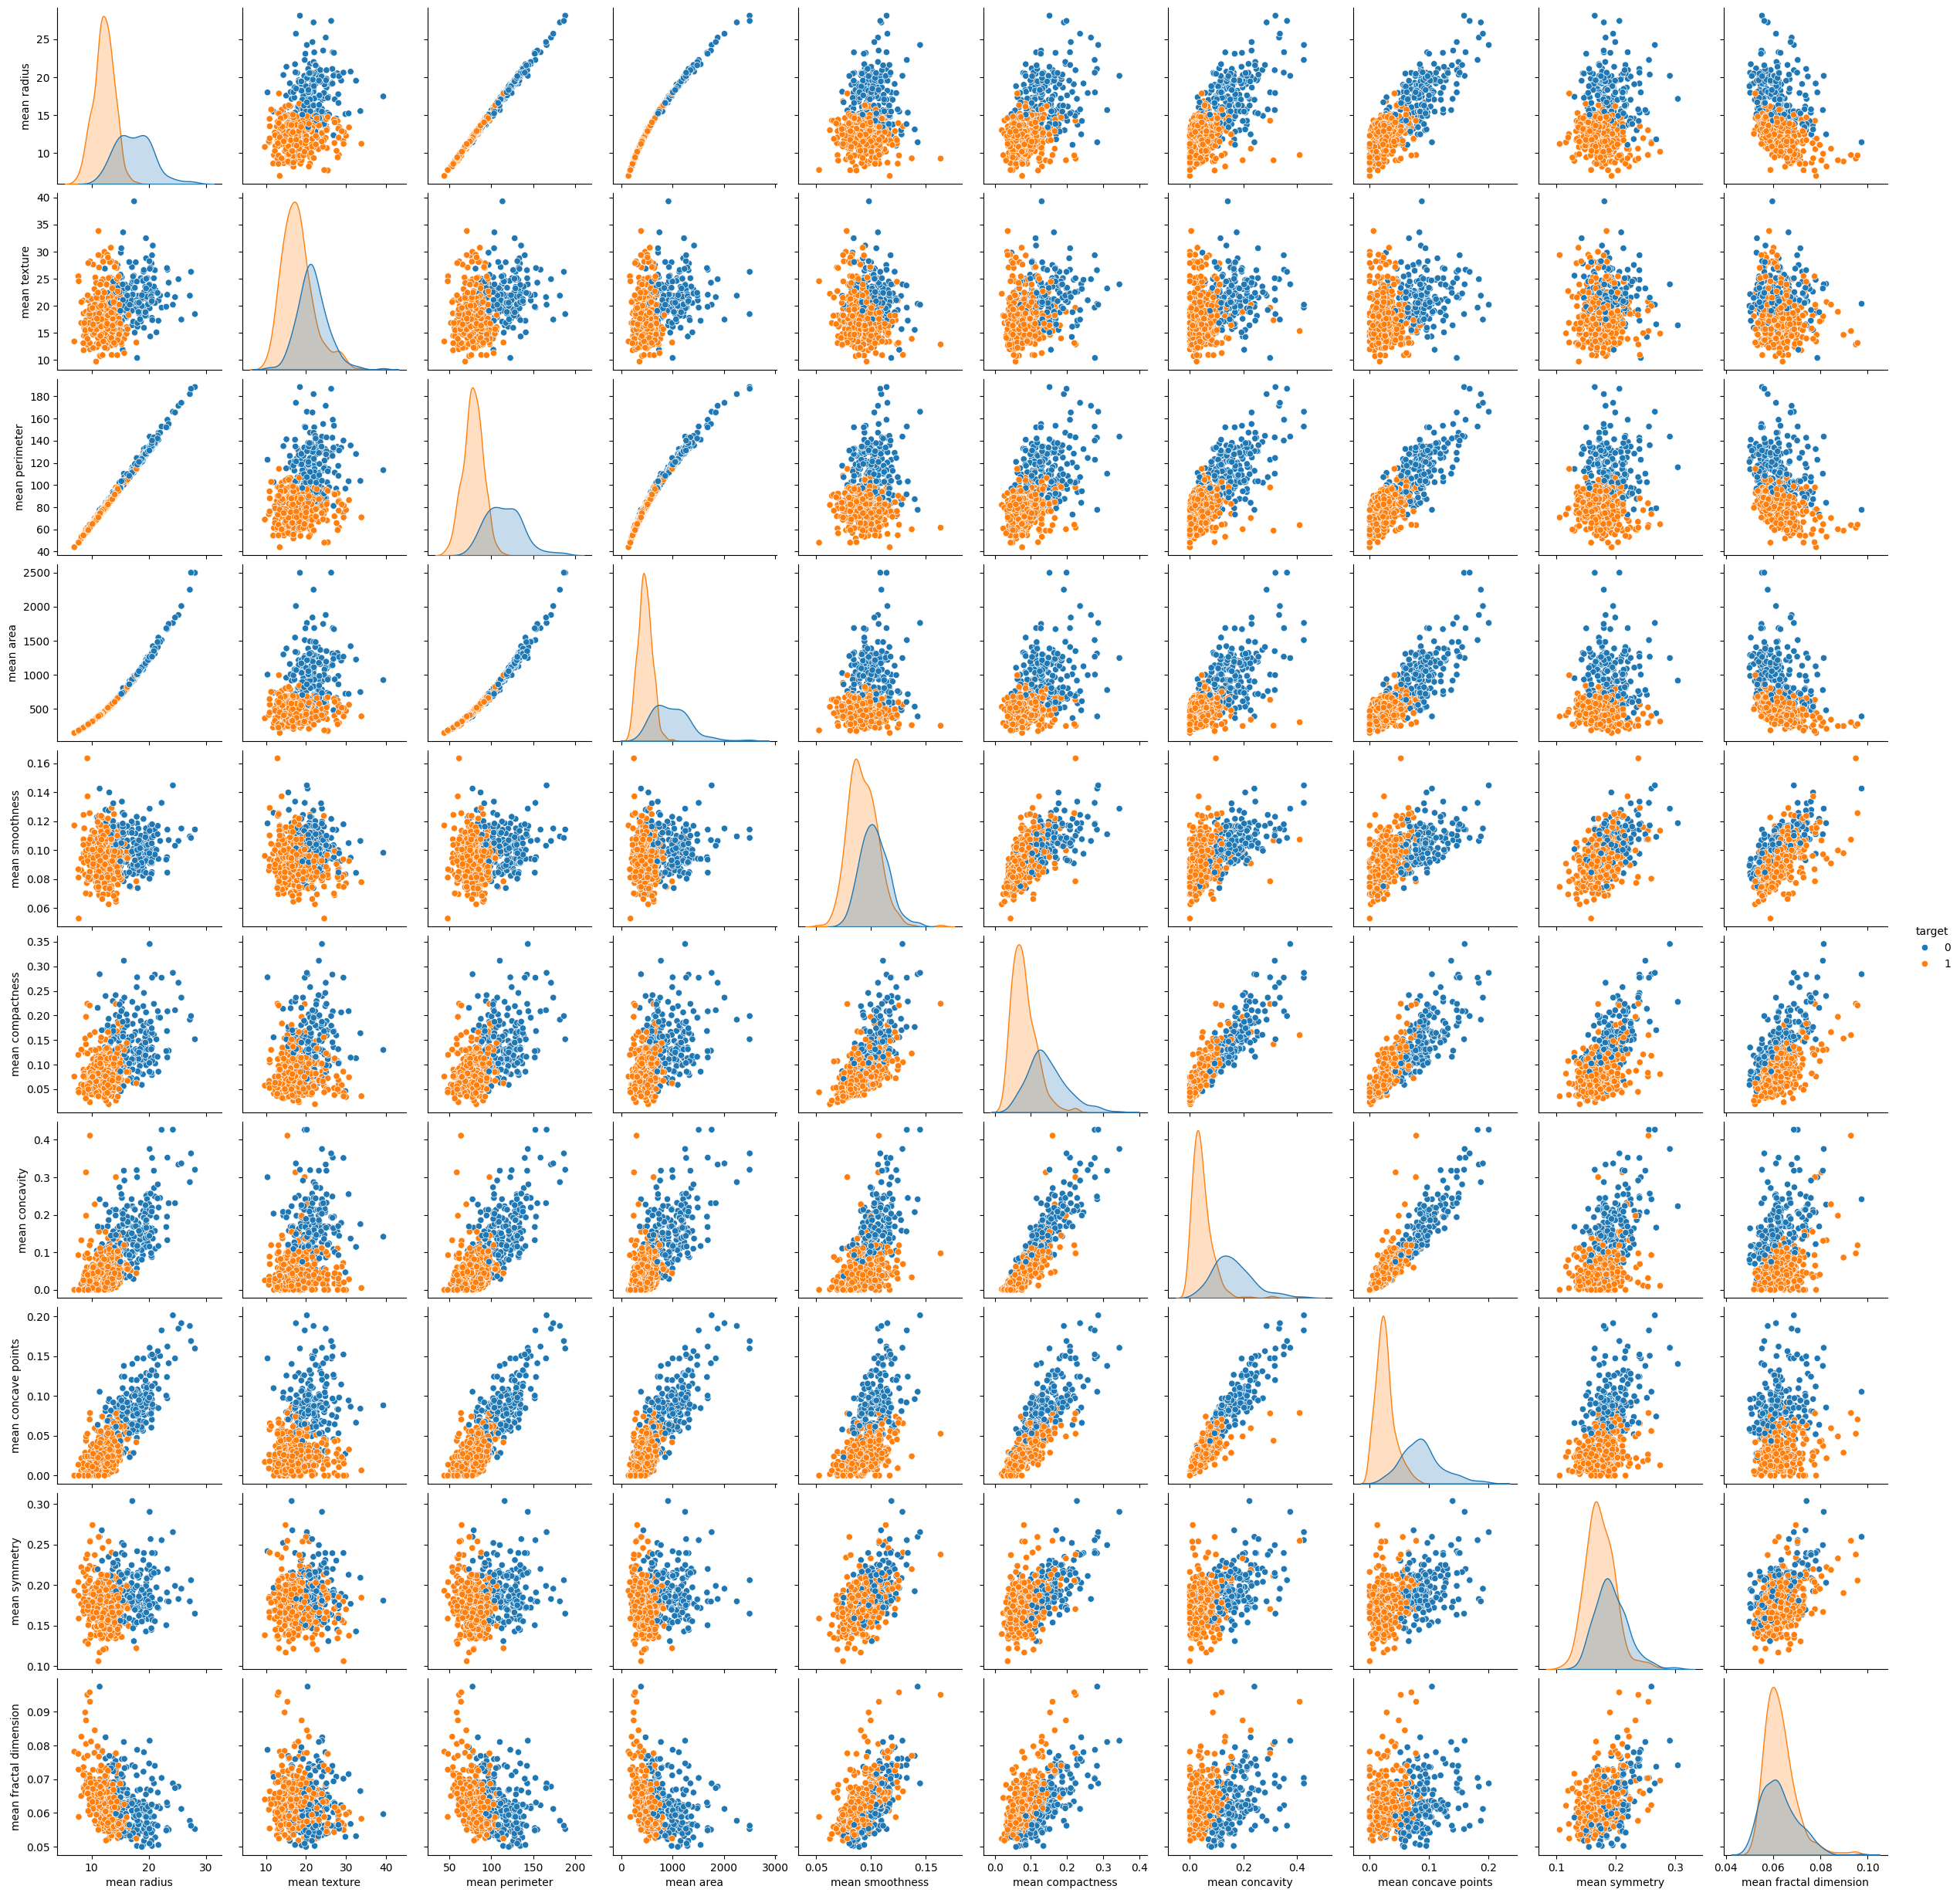

In [ ]:
import seaborn as sns

# trying pairplot with the mean values and target, since there are too many features overall
pairplot_columns = ['target', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

sns.pairplot(data=cancer_df[pairplot_columns], hue="target")

From the EDA above, I found the correlation heatmap to be the most useful measure to identify strong features to use for the model. In particular, the features that share correlation values near 1.0 but NOT 1.0 are useful because this highlights authentic correlation, but a misleading correlation simply because the features are inherently related mathematically (i.e. mean radius and mean area).

In [ ]:
from itertools import combinations

for feature1, feature2 in combinations(corr.columns, 2):
    corr_value = corr.loc[feature1, feature2]
    if (corr_value > 0.85 and corr_value < 0.98):
      print(f"{feature1} ↔ {feature2}: {corr_value:.3f}")

mean radius ↔ worst radius: 0.970
mean radius ↔ worst perimeter: 0.965
mean radius ↔ worst area: 0.941
mean texture ↔ worst texture: 0.912
mean perimeter ↔ mean concave points: 0.851
mean perimeter ↔ worst radius: 0.969
mean perimeter ↔ worst perimeter: 0.970
mean perimeter ↔ worst area: 0.942
mean area ↔ worst radius: 0.963
mean area ↔ worst perimeter: 0.959
mean area ↔ worst area: 0.959
mean compactness ↔ mean concavity: 0.883
mean compactness ↔ worst compactness: 0.866
mean concavity ↔ mean concave points: 0.921
mean concavity ↔ worst concavity: 0.884
mean concavity ↔ worst concave points: 0.861
mean concave points ↔ worst perimeter: 0.856
mean concave points ↔ worst concave points: 0.910
radius error ↔ perimeter error: 0.973
radius error ↔ area error: 0.952
perimeter error ↔ area error: 0.938
worst perimeter ↔ worst area: 0.978
worst compactness ↔ worst concavity: 0.892
worst concavity ↔ worst concave points: 0.855


Using the iteration function above, we can identify the unique pairs that produce correlation value of 0.85 or above (can be adjusted) and less than 0.98 (to avoid trivial correlation as described above). These are the seemingly "important" features that can be identified from this particular breast cancer dataset. There are some interesting correlations, and features like mean compactness to mean concavity seem important because they offer non-trivial insight into the data.

Selected data (to be used below):

mean radius  
worst perimeter  
mean texture  
mean concave points  
mean compactness  
worst compactness  
radius error  
area error  
worst perimeter  
worst concavity

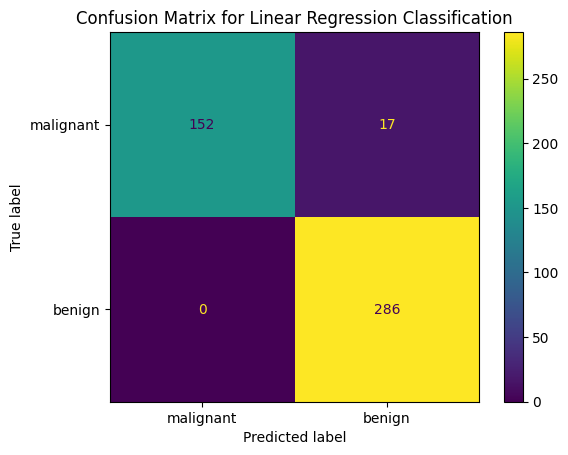

Recall Rate: 0.90


In [ ]:
# using linear regression for base binary classification
linreg = make_pipeline(StandardScaler(), LinearRegression())
linreg.fit(X_train, y_train)

# predict continuous values, then use thresholding to map pred to binary values
pred = linreg.predict(X_train)
pred_threshold = (pred >= 0.5).astype(int)

# creating confusion matrix
cm = confusion_matrix(y_train, linreg_pred)
recall_score(y_train, linreg_pred)

matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
matrix_display.plot()

plt.title("Confusion Matrix for Linear Regression Classification")
plt.show()
linreg_recall = recall_score(y_train, pred_threshold, pos_label=0)
print(f"Recall Rate: {linreg_recall:.2f}")

In [ ]:
# trying with:
# Nearest Neighbors
# Naive Bayes
# Logistic Regression
# Support Vector Machines
# Decision Trees
# Random Forests

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
nb = GaussianNB()
log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter = 3000))
svm = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Feature selection for each model - from precept 6

def select_features_knn(X, y, k=10):
    vt = VarianceThreshold(threshold=0.1)
    X_vt = vt.fit_transform(X)
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X_vt, y)
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
    return X_selected, knn

# 2. Naive Bayes with SelectKBest
def select_features_nb(X, y, k=10):
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    nb = GaussianNB()
    return X_selected, nb

# 3. Logistic Regression with RFE
def select_features_logreg(X, y, n_features_to_select=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    log_reg = LogisticRegression(random_state=42)
    selector = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)
    X_selected = selector.fit_transform(X_scaled, y)
    final_log_reg = LogisticRegression(random_state=42)
    return X_selected, final_log_reg

# 4. SVM with RFE
def select_features_svm(X, y, n_features_to_select=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    svm = SVC(kernel='linear', random_state=42)
    selector = RFE(estimator=svm, n_features_to_select=n_features_to_select)
    X_selected = selector.fit_transform(X_scaled, y)
    final_svm = SVC(kernel='linear', random_state=42)
    return X_selected, final_svm

# 5. Decision Tree with built-in feature importance
def select_features_dt(X, y, threshold=0.01):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X, y)
    importances = dt.feature_importances_
    selected_features = importances > threshold
    X_selected = X.loc[:, selected_features]
    final_dt = DecisionTreeClassifier(random_state=42)
    return X_selected, final_dt

# 6. Random Forest with built-in feature importance
def select_features_rf(X, y, threshold=0.01):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = rf.feature_importances_
    selected_features = importances > threshold
    X_selected = X.loc[:, selected_features]
    final_rf = RandomForestClassifier(random_state=42)
    return X_selected, final_rf

models = [knn, nb, log_reg, svm, dt, rf]
model_names = ['KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

# Apply feature selection and create new models
X_knn, knn = select_features_knn(features, target)
X_nb, nb = select_features_nb(features, target)
X_log_reg, log_reg = select_features_logreg(features, target)
X_svm, svm = select_features_svm(features, target)
X_dt, dt = select_features_dt(features, target)
X_rf, rf = select_features_rf(features, target)

In [ ]:
# Create a dictionary to store the selected features and corresponding models
selected_data = {
    'KNN': (X_knn, knn),
    'Naive Bayes': (X_nb, nb),
    'Logistic Regression': (X_log_reg, log_reg),
    'SVM': (X_svm, svm),
    'Decision Tree': (X_dt, dt),
    'Random Forest': (X_rf, rf)
}

# Evaluate the original models
original_scores = {}
for name, model in zip(model_names, models):
    scores = cross_val_score(model, features, target, cv=5)
    original_scores[name] = scores

# Evaluate models after feature selection using cross-validation
scores_after_selection = {}

for name, (X_selected, model) in selected_data.items():
    scores = cross_val_score(model, X_selected, target, cv=5)
    scores_after_selection[name] = scores

# Print the results
print("Results after feature selection:")
for name, score in scores_after_selection.items():
    print(f"{name} Accuracy: {np.mean(score):.2f} ± {np.std(score):.2f}")

# Compare with the original results
print("\nComparison with original results:")
for name in model_names:
    original_score = original_scores[name]
    new_score = scores_after_selection[name]
    print(f"{name}:")
    print(f"  Original: {np.mean(original_score):.2f} ± {np.std(original_score):.2f}")
    print(f"  After feature selection: {np.mean(new_score):.2f} ± {np.std(new_score):.2f}")
    print(f"  Difference: {np.mean(new_score) - np.mean(original_score):.2f}")
    print()


Results after feature selection:
KNN Accuracy: 0.93 ± 0.02
Naive Bayes Accuracy: 0.94 ± 0.02
Logistic Regression Accuracy: 0.97 ± 0.01
SVM Accuracy: 0.97 ± 0.01
Decision Tree Accuracy: 0.95 ± 0.02
Random Forest Accuracy: 0.97 ± 0.02

Comparison with original results:
KNN:
  Original: 0.96 ± 0.01
  After feature selection: 0.93 ± 0.02
  Difference: -0.03

Naive Bayes:
  Original: 0.94 ± 0.01
  After feature selection: 0.94 ± 0.02
  Difference: 0.00

Logistic Regression:
  Original: 0.98 ± 0.01
  After feature selection: 0.97 ± 0.01
  Difference: -0.01

SVM:
  Original: 0.97 ± 0.01
  After feature selection: 0.97 ± 0.01
  Difference: -0.00

Decision Tree:
  Original: 0.92 ± 0.02
  After feature selection: 0.95 ± 0.02
  Difference: 0.03

Random Forest:
  Original: 0.96 ± 0.02
  After feature selection: 0.97 ± 0.02
  Difference: 0.01



In [ ]:
# evaluate using my own feature selection, independent of models above
scores_own_selection = {}

selected = ['mean radius',
    'worst perimeter',
    'mean texture',
    'mean concave points',
    'mean compactness',
    'worst compactness',
    'radius error',
    'area error',
    'worst concavity',
    'worst perimeter']

features_selected = cancer_df[selected]

selected_data_own = {
    'KNN': (knn),
    'Naive Bayes': (nb),
    'Logistic Regression': (log_reg),
    'SVM': (svm),
    'Decision Tree': (dt),
    'Random Forest': (rf)
}

for name, (model) in selected_data_own.items():
    scores = cross_val_score(model, features_selected, target, cv=5)
    scores_own_selection[name] = scores
    print(f"{name} Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

KNN Accuracy: 0.95 ± 0.02
Naive Bayes Accuracy: 0.93 ± 0.02
Logistic Regression Accuracy: 0.97 ± 0.01
SVM Accuracy: 0.96 ± 0.02
Decision Tree Accuracy: 0.92 ± 0.03
Random Forest Accuracy: 0.95 ± 0.02


In [ ]:
# compare with the original results
print("\nComparison with original results:")
for name in model_names:
    original_score = original_scores[name]
    new_score = scores_own_selection[name]
    print(f"{name}:")
    print(f"  Original: {np.mean(original_score):.2f} ± {np.std(original_score):.2f}")
    print(f"  After feature selection: {np.mean(new_score):.2f} ± {np.std(new_score):.2f}")
    print(f"  Difference: {np.mean(new_score) - np.mean(original_score):.2f}")
    print()


Comparison with original results:
KNN:
  Original: 0.96 ± 0.01
  After feature selection: 0.95 ± 0.02
  Difference: -0.01

Naive Bayes:
  Original: 0.94 ± 0.01
  After feature selection: 0.93 ± 0.02
  Difference: -0.01

Logistic Regression:
  Original: 0.98 ± 0.01
  After feature selection: 0.97 ± 0.01
  Difference: -0.01

SVM:
  Original: 0.97 ± 0.01
  After feature selection: 0.96 ± 0.02
  Difference: -0.01

Decision Tree:
  Original: 0.92 ± 0.02
  After feature selection: 0.92 ± 0.03
  Difference: 0.00

Random Forest:
  Original: 0.96 ± 0.02
  After feature selection: 0.95 ± 0.02
  Difference: -0.01



In [ ]:
# compare with the features selected from models results
print("\nComparison with original results:")
for name in model_names:
    original_score = scores_after_selection[name]
    new_score = scores_own_selection[name]
    print(f"{name}:")
    print(f"  Original: {np.mean(original_score):.2f} ± {np.std(original_score):.2f}")
    print(f"  After feature selection: {np.mean(new_score):.2f} ± {np.std(new_score):.2f}")
    print(f"  Difference: {np.mean(new_score) - np.mean(original_score):.2f}")
    print()


Comparison with original results:
KNN:
  Original: 0.93 ± 0.02
  After feature selection: 0.95 ± 0.02
  Difference: 0.02

Naive Bayes:
  Original: 0.94 ± 0.02
  After feature selection: 0.93 ± 0.02
  Difference: -0.01

Logistic Regression:
  Original: 0.97 ± 0.01
  After feature selection: 0.97 ± 0.01
  Difference: -0.00

SVM:
  Original: 0.97 ± 0.01
  After feature selection: 0.96 ± 0.02
  Difference: -0.01

Decision Tree:
  Original: 0.95 ± 0.02
  After feature selection: 0.92 ± 0.03
  Difference: -0.03

Random Forest:
  Original: 0.97 ± 0.02
  After feature selection: 0.95 ± 0.02
  Difference: -0.02



There are some trade-offs between using the features selected by the algorithm and those identified by my EDA. We will use both and compare.

I believe that the most appropriate way to measure "goodness" of the model is recall, because this allows us to evaluate whether models can correctly identify all malignant tumors, which is most important for cancer screening. For instance, it is okay if a model falsely labels a benign tumor as a malignant tumor, but it is NOT okay other way around, since detecting absolutely all malignant tumors are critical. The code below will use different models and evaluate them using confusion matrix and recall.

KNN Training Recall: 1.00
KNN Test Recall: 0.96

Naive Bayes Training Recall: 0.97
Naive Bayes Test Recall: 1.00

Logistic Regression Training Recall: 0.99
Logistic Regression Test Recall: 0.99

SVM Training Recall: 0.99
SVM Test Recall: 0.96

Decision Tree Training Recall: 1.00
Decision Tree Test Recall: 0.96

Random Forest Training Recall: 1.00
Random Forest Test Recall: 0.99



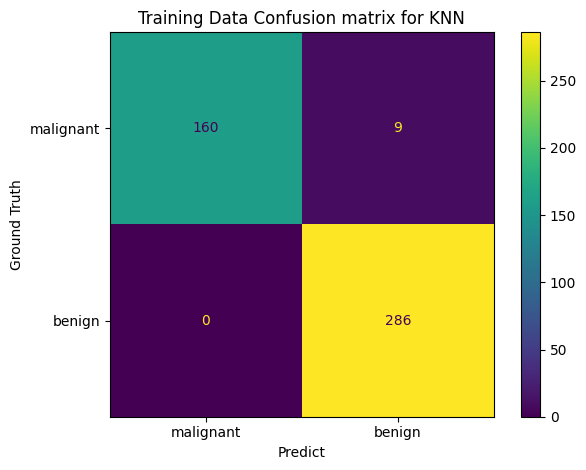

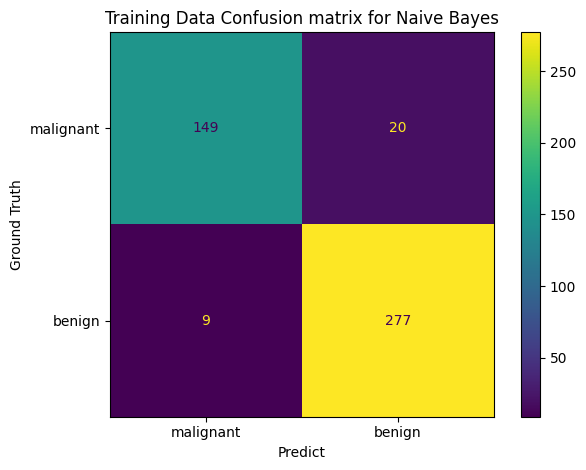

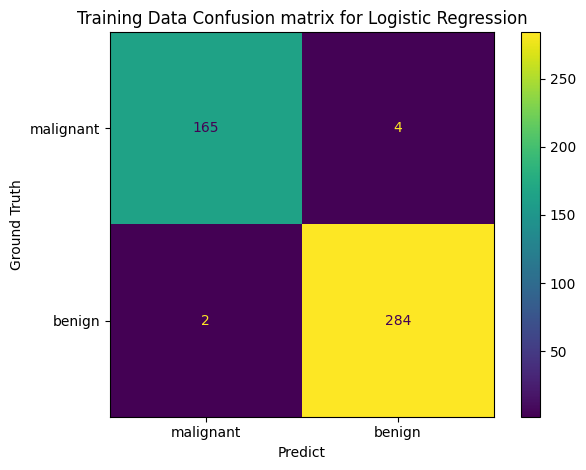

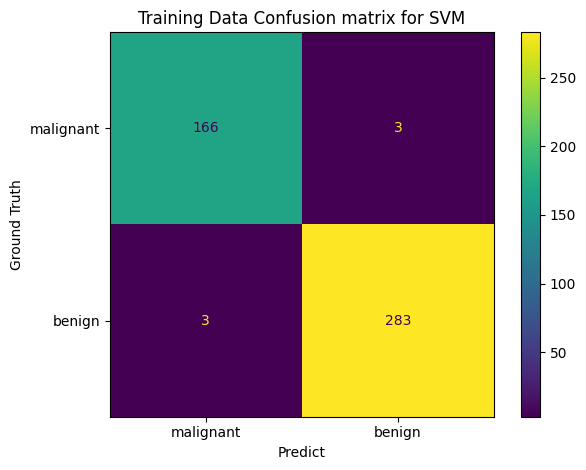

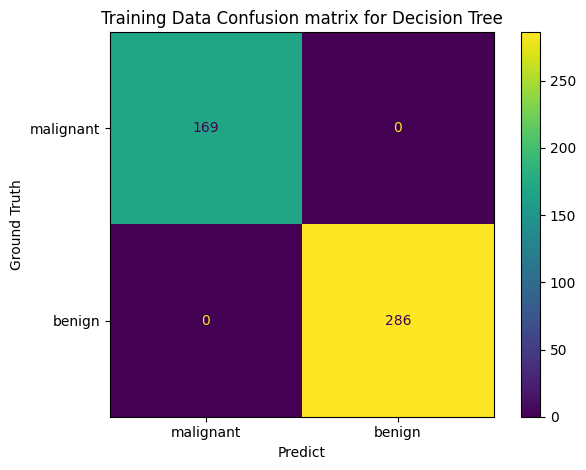

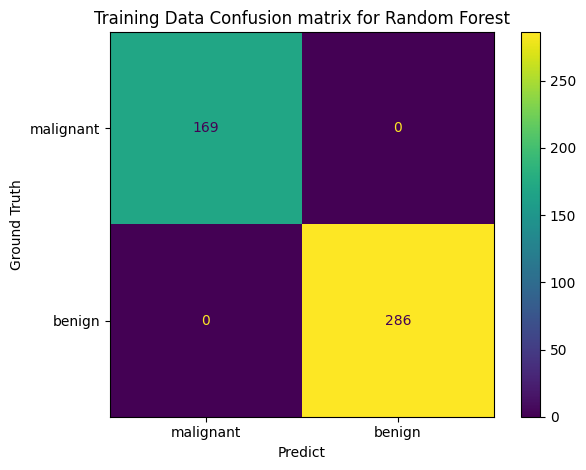

In [ ]:
# fitting models and displaying confusion matrices, using recall metric
train_scores = {}
test_scores = {}

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_scores[name] = recall_score(y_train_sel, pred, average = 'binary')
    test_scores[name] = recall_score(y_test_sel, pred_test, average = 'binary')
    print(f"{name} Training Recall: {np.mean(train_scores[name]):.2f}")
    print(f"{name} Test Recall: {np.mean(test_scores[name]):.2f}")
    print()

    cm = confusion_matrix(y_train, pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
    cm_display.plot()
    cm_display.ax_.set_title(f"Training Data Confusion matrix for {name}")
    cm_display.ax_.set_xlabel("Predict")
    cm_display.ax_.set_ylabel("Ground Truth")
    cm_display.figure_.tight_layout()

In [ ]:
# fitting models w/ selected features, using recall as metric
train_scores_select = {}
test_scores_select = {}

for name, (X_selected, model) in selected_data.items():
    # train test split for each selected subset of features, then fit and predict
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, target, test_size = 0.2, random_state = 42)
    model.fit(X_train_sel, y_train_sel)
    pred = model.predict(X_train_sel)
    pred_test = model.predict(X_test_sel)
    # calculate recall
    train_scores_select[name] = recall_score(y_train_sel, pred, average = 'binary')
    test_scores_select[name] = recall_score(y_test_sel, pred_test, average = 'binary')
    print(f"{name} Training Recall: {np.mean(train_scores_select[name]):.2f}")
    print(f"{name} Test Recall: {np.mean(test_scores_select[name]):.2f}")
    print()

KNN Training Recall: 0.98
KNN Test Recall: 1.00

Naive Bayes Training Recall: 0.95
Naive Bayes Test Recall: 1.00

Logistic Regression Training Recall: 0.99
Logistic Regression Test Recall: 0.99

SVM Training Recall: 0.99
SVM Test Recall: 0.99

Decision Tree Training Recall: 1.00
Decision Tree Test Recall: 0.92

Random Forest Training Recall: 1.00
Random Forest Test Recall: 0.97



In [ ]:
# fitting models w/ *self-selected* features
train_scores_select_own = {}
test_scores_select_own = {}

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(features_selected, target, test_size = 0.2, random_state = 42)

for name, model in zip(model_names, models):
    model.fit(X_train_sel, y_train_sel)
    pred = model.predict(X_train_sel)
    pred_test = model.predict(X_test_sel)
    train_scores_select_own[name] = recall_score(y_train_sel, pred, average = 'binary')
    test_scores_select_own[name] = recall_score(y_test_sel, pred_test, average = 'binary')
    print(f"{name} Training Recall: {np.mean(train_scores_select_own[name]):.2f}")
    print(f"{name} Test Recall: {np.mean(test_scores_select_own[name]):.2f}")
    print()

KNN Training Recall: 0.98
KNN Test Recall: 0.97

Naive Bayes Training Recall: 0.96
Naive Bayes Test Recall: 0.99

Logistic Regression Training Recall: 0.99
Logistic Regression Test Recall: 0.99

SVM Training Recall: 0.99
SVM Test Recall: 0.99

Decision Tree Training Recall: 1.00
Decision Tree Test Recall: 0.96

Random Forest Training Recall: 1.00
Random Forest Test Recall: 0.99



From rough comparison above, we can see that the selected features generally perform better in recall, with my own selected features doing better in Decision Trees.

In [ ]:
# comparing recall results for original vs selected features
for name in model_names:
    original_recall_train = train_scores[name]
    new_recall_train = train_scores_select[name]
    original_recall_test = test_scores[name]
    new_recall_test = test_scores_select[name]

    print(f"{name}:")
    # for recall on training data
    print("Train Data: ")
    print(f"  Original Recall: {original_recall_train:.2f}")
    print(f"  After feature selection: {new_recall_train:.2f}")
    print(f"  Train Data Difference: {new_recall_train - original_recall_train:.2f}")

    # for recall on testing data
    print("Test Data: ")
    print(f"  Original Recall: {original_recall_test:.2f}")
    print(f"  After feature selection: {new_recall_test:.2f}")
    print(f"  Test Data Difference: {new_recall_test - original_recall_test:.2f}")
    print()

KNN:
Train Data: 
  Original Recall: 1.00
  After feature selection: 0.98
  Train Data Difference: -0.02
Test Data: 
  Original Recall: 0.96
  After feature selection: 1.00
  Test Data Difference: 0.04

Naive Bayes:
Train Data: 
  Original Recall: 0.97
  After feature selection: 0.95
  Train Data Difference: -0.01
Test Data: 
  Original Recall: 1.00
  After feature selection: 1.00
  Test Data Difference: 0.00

Logistic Regression:
Train Data: 
  Original Recall: 0.99
  After feature selection: 0.99
  Train Data Difference: -0.00
Test Data: 
  Original Recall: 0.99
  After feature selection: 0.99
  Test Data Difference: 0.00

SVM:
Train Data: 
  Original Recall: 0.99
  After feature selection: 0.99
  Train Data Difference: 0.00
Test Data: 
  Original Recall: 0.96
  After feature selection: 0.99
  Test Data Difference: 0.03

Decision Tree:
Train Data: 
  Original Recall: 1.00
  After feature selection: 1.00
  Train Data Difference: 0.00
Test Data: 
  Original Recall: 0.96
  After feature

In [ ]:
# comparing recall results for algorithm-selected vs *self-selected* features
for name in model_names:
    original_recall_train = train_scores_select[name]
    new_recall_train = train_scores_select_own[name]
    original_recall_test = test_scores_select[name]
    new_recall_test = test_scores_select_own[name]

    print(f"{name}:")
    # for recall on training data
    print("Train Data: ")
    print(f"  Feature Selection Recall: {original_recall_train:.2f}")
    print(f"  Self-feature Selection Recall: {new_recall_train:.2f}")
    print(f"  Train Data Difference: {new_recall_train - original_recall_train:.2f}")

    # for recall on testing data
    print("Test Data: ")
    print(f"  Feature Selection Recall: {original_recall_test:.2f}")
    print(f"  Self-feature Selection Recall: {new_recall_test:.2f}")
    print(f"  Test Data Difference: {new_recall_test - original_recall_test:.2f}")
    print()

KNN:
Train Data: 
  Feature Selection Recall: 0.98
  Self-feature Selection Recall: 0.98
  Train Data Difference: 0.00
Test Data: 
  Feature Selection Recall: 1.00
  Self-feature Selection Recall: 0.97
  Test Data Difference: -0.03

Naive Bayes:
Train Data: 
  Feature Selection Recall: 0.95
  Self-feature Selection Recall: 0.96
  Train Data Difference: 0.00
Test Data: 
  Feature Selection Recall: 1.00
  Self-feature Selection Recall: 0.99
  Test Data Difference: -0.01

Logistic Regression:
Train Data: 
  Feature Selection Recall: 0.99
  Self-feature Selection Recall: 0.99
  Train Data Difference: -0.00
Test Data: 
  Feature Selection Recall: 0.99
  Self-feature Selection Recall: 0.99
  Test Data Difference: 0.00

SVM:
Train Data: 
  Feature Selection Recall: 0.99
  Self-feature Selection Recall: 0.99
  Train Data Difference: -0.00
Test Data: 
  Feature Selection Recall: 0.99
  Self-feature Selection Recall: 0.99
  Test Data Difference: 0.00

Decision Tree:
Train Data: 
  Feature Select

The results above highlights that selecting features generally improved recall values on the test data compared to original, aside from the decision tree case. Furthermore, using the self-selected features showcase a worsened performance on KNN and slight decrease in Naive Bayes, but an increase in Decision Trees and Random Forest. As such, there are different models for which different feature selection shines. A large deviation between the training and testing data recall, particularly when the training recall > testing recall implies overfitting.

The models that performed the best (1.00 recall) on training data are: KNN (original), Decision Trees (both original & feature selected), and Random Forest (both original & feature selected).

The models that performed the best (1.00 recall) on testing data are: Naive Bayes (original & feature selected), KNN (feature selected). There are also some close models with 0.99 recall.

As done previously, to determine which features were most important, we will re-run the feature importance selection algorithm from precept.

In [ ]:
# return only the feature names

feature_selectors = [
    ("KNN", select_features_knn),
    ("Naive Bayes", select_features_nb),
    ("Logistic Regression", select_features_logreg),
    ("SVM", select_features_svm),
    ("Decision Tree", select_features_dt),
    ("Random Forest", select_features_rf)
]

# 1. KNN
def select_features_knn(X, y, k=10):
    # vt = VarianceThreshold(threshold=0.1)
    # X_vt = vt.fit_transform(X)
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    return selector.get_support()

# 2. Naive Bayes with SelectKBest
def select_features_nb(X, y, k=10):
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    return selector.get_support()

# 3. Logistic Regression with RFE
def select_features_logreg(X, y, n_features_to_select=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    log_reg = LogisticRegression(random_state=42)
    selector = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)
    X_selected = selector.fit_transform(X_scaled, y)
    return selector.get_support()

# 4. SVM with RFE
def select_features_svm(X, y, n_features_to_select=10):
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)
    svm = SVC(kernel='linear', random_state=42)
    selector = RFE(estimator=svm, n_features_to_select=n_features_to_select)
    selector.fit(X, y)
    return selector.get_support()

# 5. Decision Tree with built-in feature importance
def select_features_dt(X, y, threshold=0.01):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X, y)
    importances = dt.feature_importances_
    selected_features = importances > threshold
    return selected_features

# 6. Random Forest with built-in feature importance
def select_features_rf(X, y, threshold=0.01):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = rf.feature_importances_
    selected_features = importances > threshold
    return selected_features

# print important features
for name, func in feature_selectors:
    index = func(X_train, y_train)
    selected_features = X_train.columns[index]
    print(f"{name} selected features:\n{selected_features.tolist()}\n")

KNN selected features:
['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

Naive Bayes selected features:
['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

Logistic Regression selected features:
['mean concave points', 'radius error', 'area error', 'compactness error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

SVM selected features:
['mean radius', 'mean concavity', 'mean concave points', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']

Decision Tree selected features:
['mean texture', 'mean concave points', 'area error', 'concave points error', 'fractal dimension error', 'worst

There are certainly some overlapping important features between models, but not all shares the same features. For instance, KNN and Naive Bayes share identical feature importance but KNN and Decision Tree drastically differ. In general, the features selected here reflect similar to my predictions in 1b. However, I predicted a general set of features for ALL models in 1b, so here, some models share a subset of features from the ones I predicted in 1b, whereas others may differ slightly. This makes sense because the general prediction from EDA in 1b represents features that are likely to show good correlation, but not all such features will necessarily be beneficial / the best for all models (difference by nature/characteristics of each model).  

To me, the Naive Bayes is the easiest to explain because Naive Bayes predicts the next likely outcome given a feature, hence all of its feature selected are somehow correlated to the preceding one. For instance, mean radius, mean perimeter, and mean area are all related to each other. Mean concavity and mean concave points are also related, etc.

To doctors performing screenings based on these images, knowing which features are important, along with what model their importance is associated with, can be very helpful for them to quickly scan & identify any big red flags for cancer suspicion. Knowing how irregularities / flags in certain features correlate with other features / previous medical expertise of the doctor can be very useful if they understand this information.

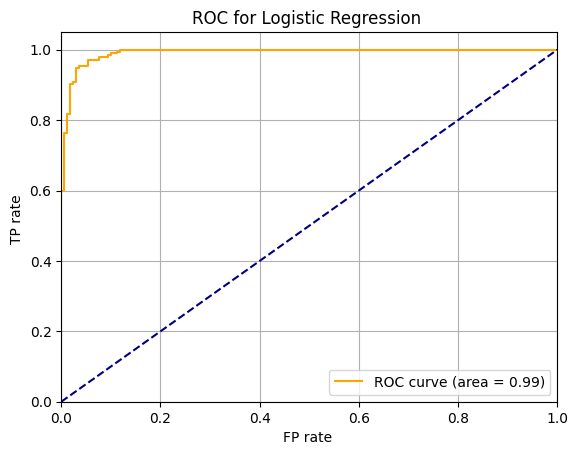

ROC area under curve: 0.9916


In [ ]:
# plotting ROC curve

# calculate score
log_reg.fit(X_test, y_test)
y_score = log_reg.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_score)

roc_auc = auc(fpr, tpr)

# plotting
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP rate ')
plt.ylabel('TP rate ')
plt.title('ROC for Logistic Regression ')
plt.legend()
plt.grid()
plt.show()

# area under curve
print(f"ROC area under curve: {roc_auc:.4f}")

The area under the ROC curve, 0.9916, tells us that the binary classification done using the logistic regression is able to distinguish the two classes extremely well.

In [ ]:
thresholds

array([           inf, 9.99996902e-01, 9.91825985e-01, 9.91695047e-01,
       9.67128926e-01, 9.65094053e-01, 9.40693250e-01, 9.39577687e-01,
       8.28300897e-01, 8.23766774e-01, 8.10857558e-01, 8.05305435e-01,
       6.76138565e-01, 6.48493257e-01, 5.57840679e-01, 5.36660894e-01,
       4.95291004e-01, 4.68369769e-01, 4.65125109e-01, 4.37693255e-01,
       4.34124818e-01, 4.25802868e-01, 4.23371181e-01, 4.09451482e-01,
       3.93778036e-01, 3.87339519e-01, 3.33910835e-01, 6.56760563e-19])

In [ ]:
# determine the optimal threshold - Extra Credit

op = tpr - fpr
optimal_threshold = thresholds[np.argmax(op)]

print(f"threshold to optimize recall measure: {optimal_threshold:.4f}")

threshold to optimize recall measure: 0.5578


The threshold to optimize the "goodness" measure (recall) can be found by maximizing the difference between TPR and FPR, then taking that as the index of the thresholds (using Youden's J Statistic)